# 半導体セクター比較

材料メーカー vs. 製造装置

In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

In [21]:
def weekly_chart(ticker: yf.Ticker) -> pd.DataFrame:
    df = ticker.history(interval='1wk', start='2022-09-05', end='2024-09-07')

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)

    mpf.plot(
        df,
        type='candle',
        style='yahoo',
        mav=(13, 26, 52),
        volume=False,
        datetime_format='%Y-%m-%d',
        xrotation=0,
        ax=ax,
    )
    ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' % (ticker.info['longName'], ticker.info['symbol']))
    ax.grid()

    return df

## 東京エレクトロン

                                   Open          High           Low  \
Date                                                                  
2022-09-05 00:00:00+09:00  13209.430505  13592.676143  13020.948743   
2022-09-12 00:00:00+09:00  13727.755645  13815.713496  12851.315430   
2022-09-19 00:00:00+09:00  12851.314528  13093.198832  12433.512695   
2022-09-26 00:00:00+09:00  12373.826819  12414.664224  11016.758226   
2022-10-03 00:00:00+09:00  11442.398313  12650.920934  11387.757334   

                                  Close    Volume  Dividends  Stock Splits  
Date                                                                        
2022-09-05 00:00:00+09:00  13485.870117  16581900    0.00000           0.0  
2022-09-12 00:00:00+09:00  12851.315430  21410100    0.00000           0.0  
2022-09-19 00:00:00+09:00  12694.246094  10380600    0.00000           0.0  
2022-09-26 00:00:00+09:00  11214.664062  26498400  285.66666           0.0  
2022-10-03 00:00:00+09:00  12480.570312 

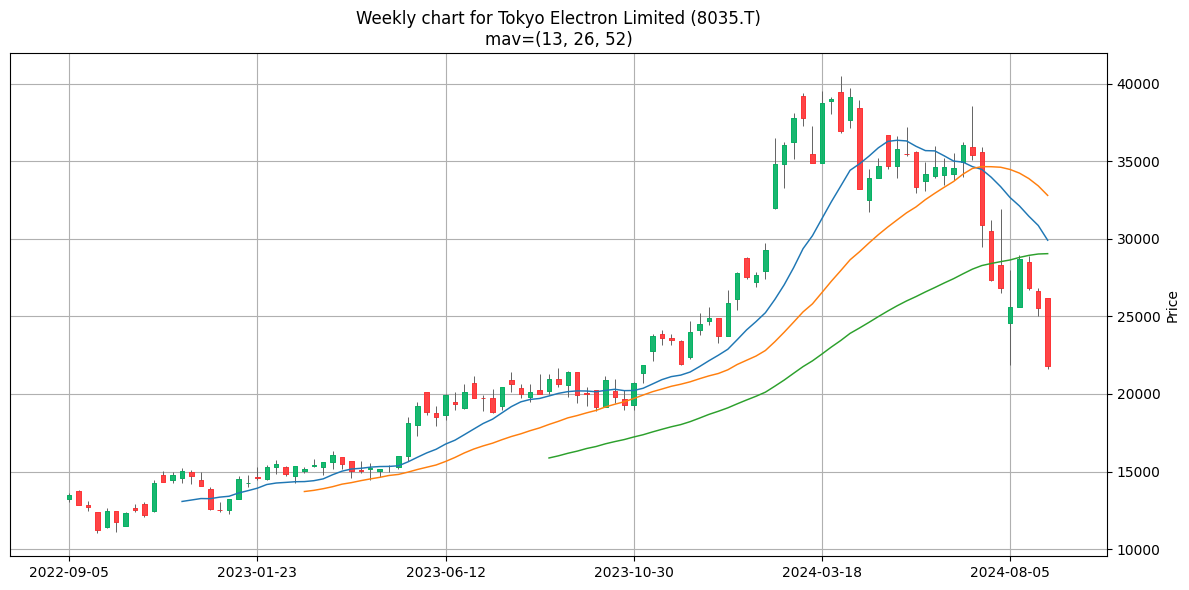

In [22]:
symbol1 = '8035.T' # 東京エレクトロン
ticker1 = yf.Ticker(symbol1)
df1 = weekly_chart(ticker1)
print(df1.head())
print(df1.tail())
plt.tight_layout()
plt.savefig('weekly_chart_20240913_8035.png')
plt.show()

## 信越化学

                                  Open         High          Low        Close  \
Date                                                                            
2022-09-05 00:00:00+09:00  3025.773651  3115.601306  3011.590337  3110.873535   
2022-09-12 00:00:00+09:00  3171.388988  3175.171205  3005.916992  3005.916992   
2022-09-19 00:00:00+09:00  3005.916834  3059.813424  2923.653618  2944.455811   
2022-09-26 00:00:00+09:00  2868.811611  2868.811611  2682.537423  2709.958496   
2022-10-03 00:00:00+09:00  2786.665959  3011.366108  2774.182617  2968.154541   

                             Volume  Dividends  Stock Splits  
Date                                                          
2022-09-05 00:00:00+09:00  31722000        0.0           0.0  
2022-09-12 00:00:00+09:00  30663500        0.0           0.0  
2022-09-19 00:00:00+09:00  16186500        0.0           0.0  
2022-09-26 00:00:00+09:00  41917500       45.0           0.0  
2022-10-03 00:00:00+09:00  38902500        0.0        

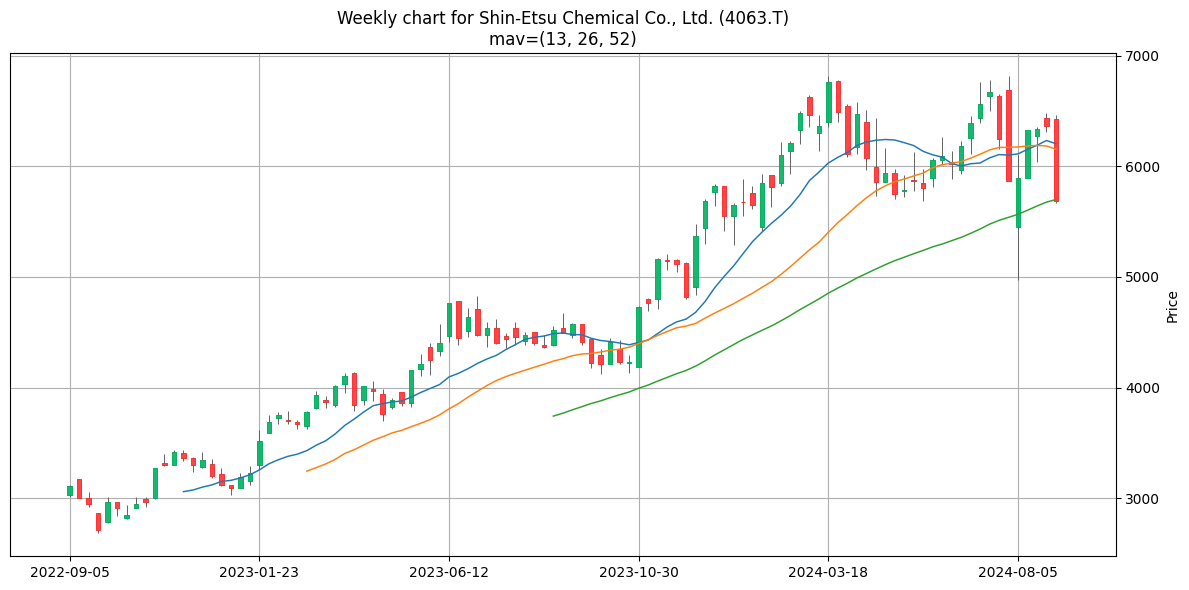

In [23]:
symbol2 = '4063.T' # 信越化学
ticker2 = yf.Ticker(symbol2)
df2 = weekly_chart(ticker2)
print(df2.head())
plt.tight_layout()
plt.savefig('weekly_chart_20240913_4063.png')
plt.show()

In [24]:
def change_ratio(ticker, df):
    ser = pd.Series(df['Close'])
    origin = ser.iloc[0]
    return pd.Series([(v - origin) / origin for v in ser], name=ticker.info['symbol'], index=df.index)

In [25]:
series1 = change_ratio(ticker1, df1)
series2 = change_ratio(ticker2, df2)

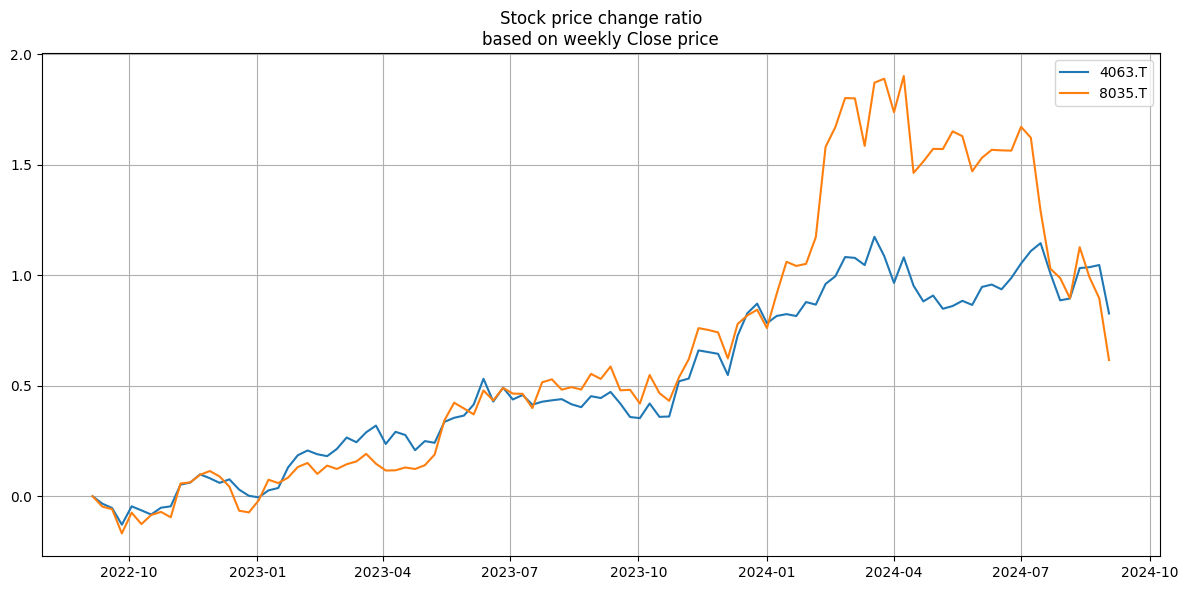

In [26]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.plot(series2, label=series2.name)
ax.plot(series1, label=series1.name)

ax.set_title('Stock price change ratio\nbased on weekly Close price')

plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('weekly_chart_20240913_4063_8035.png')

plt.show()